# Data Workshop Foundation Warsaw - project 2 

Autor: Mateusz Rymuza

## Table of content

- [1. Load Data](#1)
    - [1.1 Basic data info](#1-1)
- [2. Splitting data into train/test set](#2)   
- [3. Createing instance of model](#3)
- [4. Evaluating model](#4)
    - [4.1 Accuracy](#4-1)
    - [4.2 Confusion matrix](#4-2)
    - [4.3 Precision](#4-3)
    - [4.4 Recall](#4-4)
    - [4.5 F1 score](#4-5)
    - [4.6 Roc and AUC](#4-6)


 <a name=1></a>
## 1. Load Data

In [127]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('../input/Data.csv', index_col=0)

In [64]:
undersampled_data = pd.read_csv('../input/undersampled_data.csv', index_col=0)

In [7]:
data.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,0,62,0,0,1,0,0,0,0,0
1,558997776694438,1,56,0,0,0,0,0,0,0,0
2,4262962299951,0,62,1,0,0,0,0,0,0,0
3,867951213174,0,8,2,0,0,0,0,0,0,0
4,8841186448183,0,56,0,0,1,1,0,0,0,0


In [65]:
undersampled_data.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
16289,29537222195664,0,26,38,0,0,0,0,0,0,0
27448,8796738397391,1,7,14,0,0,0,0,0,0,0
20988,113296798724481,0,24,3,0,0,0,0,0,1,0
62581,8783321754232,1,78,21,0,0,0,0,0,0,0
33051,5832553961245,0,3,31,1,0,0,0,0,0,0


 <a name=1-1></a>
### 1.1 Basic data info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 11 columns):
PatientId        110527 non-null int64
Gender           110527 non-null int64
Age              110527 non-null int64
Neighbourhood    110527 non-null int64
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null int64
dtypes: int64(11)
memory usage: 10.1 MB


In [67]:
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44638 entries, 16289 to 110516
Data columns (total 11 columns):
PatientId        44638 non-null int64
Gender           44638 non-null int64
Age              44638 non-null int64
Neighbourhood    44638 non-null int64
Scholarship      44638 non-null int64
Hipertension     44638 non-null int64
Diabetes         44638 non-null int64
Alcoholism       44638 non-null int64
Handcap          44638 non-null int64
SMS_received     44638 non-null int64
No-show          44638 non-null int64
dtypes: int64(11)
memory usage: 4.1 MB


In [9]:
data.describe()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,0.350023,37.088874,30.456766,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,0.476979,23.110205,19.721037,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,0.000000,18.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,0.000000,37.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,1.000000,55.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a name=2></a>
## 2. Spliting data

In [10]:
from sklearn.model_selection import train_test_split

In [68]:
X = data.drop('No-show', axis=1)
y = data['No-show']
X_uds = undersampled_data.drop('No-show', axis=1)
y_uds = undersampled_data['No-show']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_uds, y_uds)

In [13]:
y.mean()

0.20193255946510807

In [14]:
y_train.mean()

0.20193015260269015

In [15]:
y_test.mean()

0.20193977996525767

<a name=3></a>
## 3. Create instance of model



In [128]:
from xgboost import XGBClassifier

In [86]:
# creating instance of XGB with few parameters 
model = XGBClassifier()
model_u = XGBClassifier()

In [87]:
# fitting model to data
model.fit(X_train, y_train)
model_u.fit(X_train_u, y_train_u)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [88]:
y_pred = model.predict(X_test)
y_pred_u = model_u.predict(X_test_u)

In [89]:
models = [(y_test, y_pred), (y_test_u, y_pred_u)]

<a name=4></a>
## 4. Evaluating model

Since we have trained our classifier, now we need to chceck its performance. 

To evaluate it we will use our test set.

I will introduce a few metrics, that are used as evaluation tools.

<a name=4-1></a>
### 4.1 Accuracy

Let's start with simplest one. 

Accuracy can be defined as a ratio of correctly labeled observations to whole test set.


$$Accuracy = \frac{y_p}{y_t} \tag{Eq 1}$$

where:
 - y_p : sum of correct predicions 
 - y_t : total size of test set

In [20]:
from sklearn.metrics import accuracy_score

In [121]:
for model in models:
    accuracy = accuracy_score(model[0], model[1])
    print(f'Accuracy = {accuracy:.3f}' + '\n')

Accuracy = 0.798

Accuracy = 0.581



Why accuracy is not always good metric?

In [129]:
zeros = np.zeros_like(y_test.values)

In [138]:
accuracy_score(y_test.values, zeros)

0.7980602200347423

<a name=4-2></a>
### 4.2 Confusion matrix

Confusion matrix is comonly used tool, that takes our predictions, and test vectors and for each pair (prediction, true value) counts 4 possible occurances:
 - both prediction and true value are positive (1): - True Positive (left top corner on Figure)
 - prediction is positive (1), but true value is negative(0) - False Positive (left bottom corner)
 - prediction is negative (0), but true value is positive(1) - False Negative (right top corner)
 - both pred and true value are negative (0) - True Negative (bottom right corner)

<div style="width:image width px; font-size:100%; text-align:center;"><img src='../images/ConfMat.png' alt="alternate text" width="width" height="height" style="width:300px;height:250px;" /> Figure 1 </div> 

   [Source](https://blog.revolutionanalytics.com/2016/03/classification-models.html)  


In [22]:
from sklearn.metrics import confusion_matrix

In [100]:
#initiate confusion matrix
mats = []
for model in models:
    mat = confusion_matrix(model[0], model[1])
    mats.append(mat)

Let's plot it in more visible way

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

[[22050     2]
 [ 5579     1]]


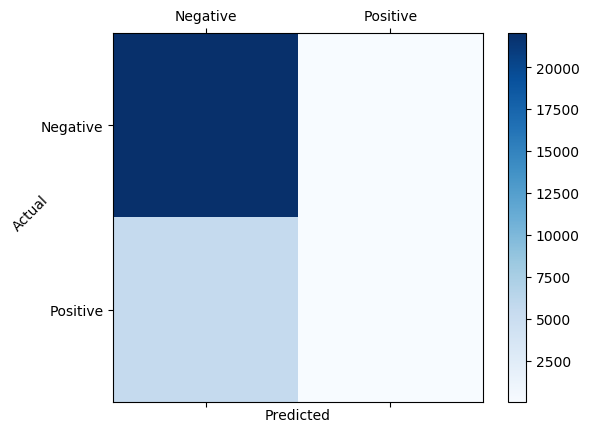

In [103]:
print(mats[0])
plt.style.use('default')
labels = ['Negative', 'Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mats[0], cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual', {'rotation':45})
plt.show()

[[3577 2032]
 [2646 2905]]


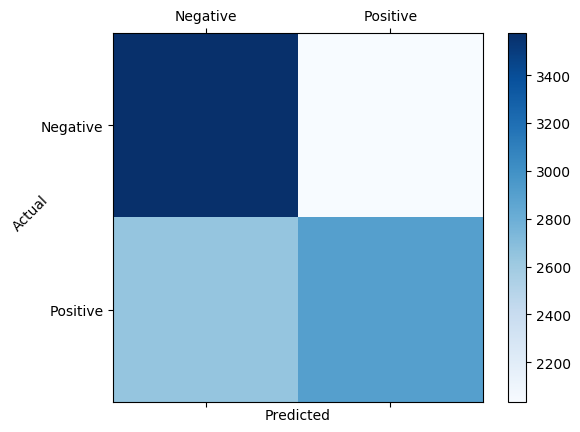

In [104]:
print(mats[1])
plt.style.use('default')
labels = ['Negative', 'Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mats[1], cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual', {'rotation':45})
plt.show()

<a name=4-3></a>
### 4.3 Precision

Precision can be interpreted as fraction of labels clasified as TP (True Positive) to sum of all examples calssified as True


$$Precision = \frac{TP}  {TP + FP} \tag{Eq2}$$

where:
 - TP : amount of labels classified as True Positive 
 - FP : amount of labels classified as False Positive

In [35]:
from sklearn.metrics import precision_score

In [120]:
for model in models:
    precision = precision_score(model[0], model[1])
    print(f'Precision = {precision:.3f}' + '\n')

Precision = 0.333

Precision = 0.588



<a name=4-4></a>
### 4.4 Recall

Precision is a measures ratio of labels classifed as TP (True Positive) to sum of all labels that are True


$$Recall = \frac{TP}  {TP + FN} \tag{Eq3}$$

where:
 - TP : amount of labels classified as True Positive 
 - FN : amount of labels classified as False Negative

In [37]:
from sklearn.metrics import recall_score

In [119]:
for model in models:
    recall = recall_score(model[0], model[1])
    print(f'Recall = {recall:.3f}' + '\n')

Recall = 0.000

Recall = 0.523



<a name=4-5></a>
### 4.5 F1 score

F1 score is described as harmonic mean of precision and recall

$$F_1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 * \frac{Precision * Recall}{Precision+Recall} \tag{Eq4}$$

In [40]:
from sklearn.metrics import f1_score

In [122]:
for model in models:
    F1 = f1_score(model[0], model[1])
    print(f'F1 score = {F1:.3f}' + '\n')

F1 score = 0.000

F1 score = 0.554



<a name=4-6></a>
### 4.6 ROC and AUC

ROC (Receiver Operating Characteristic) is a plot of TPR(True Positive Rate, Recall in other words) in function of FPR(False Positive Rate)

FPR can be written as 1 - specificity

$$FPR = \frac{FP}{N} = \frac{FP}{FP + TN} = 1 - specificity \tag{Eq5}$$

AUC (Area Under Curve) measures area under ROC curve

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [110]:
tprs =[]
fprs = []
aucs = []
for model in models:
    fpr, tpr, thresholds = roc_curve(model[0], model[1])
    auc = roc_auc_score(model[0], model[1])
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc)

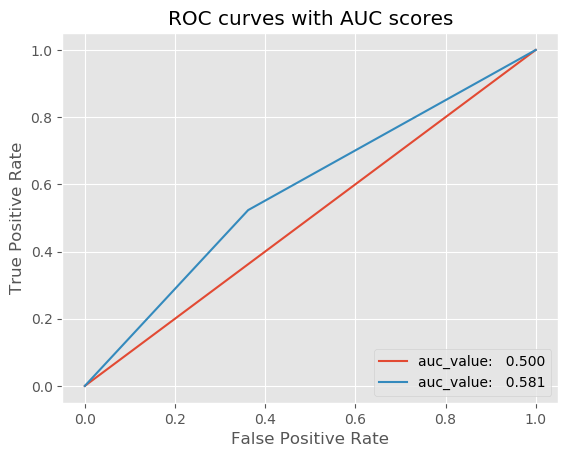

In [125]:
plt.style.use('ggplot')
plt.plot(fprs[0], tprs[0], label=f'auc_value:   {aucs[0]:.3f}')
plt.plot(fprs[1], tprs[1], label=f'auc_value:   {aucs[1]:.3f}')
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curves with AUC scores')
plt.show()